# Boosting and Bagging models 

## Thomaskutty_20122011

## Loading the libraries 

In [214]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

## Loading the dataset 

In [215]:
df = pd.read_csv('/home/thomaskutty/Downloads/train-1.csv')
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [216]:
df.shape

(2834, 6)

In [217]:
df.isna().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

Since we have 2004 missing values in url_legal and license feature there is no point of keeping those feature. 
So, we will remove that. 

In [218]:
df = df.drop(['url_legal', 'license'], axis = 1)

In [219]:
df.head() 

,id,excerpt,target,standard_error
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845


# Generating features using  a customized function

In [220]:
def generate_features(df):
    word_count  = [len(df.iloc[i]['excerpt'].split(' ')) for i in range(len(df))]
    sent_count = [len(df.iloc[i]['excerpt'].split('.'))  for i in range(len(df))]
    
    
    
    df['passive_rate'] = [ df.iloc[i]['excerpt'].count('ed by') /
                           len(df.iloc[i]['excerpt'].split('.')) for i in range(len(df))]
    comma_rate = [df.iloc[i]['excerpt'].count(',') / 
                   len(df.iloc[i]['excerpt'].split('.'))for i in range(len(df))]
    df['comma_count'] = comma_rate
    df['word_count'] = word_count 
    df['sent_count'] = sent_count
    
    df['sent_mix_word'] =  df['sent_count'] / df['word_count']
    
    # storing the high len. word counts 
    lmt = []
    for j in range(len(df)):    
        lmt.append(   (len([ i  for i in df.iloc[j]['excerpt'].split(' ')  if len(i)> 7])) / 
                  len(df.iloc[j]['excerpt'].split('.')))
        
    df['high_ln_wds'] = lmt
        
    # storing the low lenth word_cunts 
    ltt = []
    for j in range(len(df)):    
        ltt.append((len([ i  for i in df.iloc[j]['excerpt'].split(' ')  if len(i)< 3])))
    df['low_ln_wds'] = ltt
      
    def high_sent(row):
        l = list() 
        for i in row.split('.'):
            spltl =  i.split(' ')
            l.append(len(spltl)) 
        return len([ i for i in l if i > 25])

    final_lit = []
    for i in range(len(df)): 
        final_lit.append(high_sent(df.iloc[i]['excerpt']))
      
    df['high_sent'] = final_lit



    def low_sent(row):
        l = list() 
        for i in row.split('.'):
            spltl =  i.split(' ')
            l.append(len(spltl)) 
        return len([ i for i in l if i < 10])


 
    final_lot = []
    for j in range(len(df)): 
        final_lot.append(low_sent(df.iloc[j]['excerpt']))
      
    df['low_sent'] = final_lot

    return df

## Applying the generate_features function

In [221]:
df = generate_features(df)
df.head()

,id,excerpt,target,standard_error,passive_rate,comma_count,word_count,sent_count,sent_mix_word,high_ln_wds,low_ln_wds,high_sent,low_sent
0,c12129c31,When the young people returned to the ballroom...,-0.340259,0.464009,0.0,1.166667,174,12,0.068966,2.166667,22,1,2
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,0.0,2.181818,164,11,0.067073,2.090909,26,2,4
2,b69ac6792,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,0.0,1.416667,162,12,0.074074,1.750000,29,2,4
3,dd1000b26,And outside before the palace a great garden w...,-1.054013,0.450007,0.0,3.833333,163,6,0.036810,2.333333,18,4,1
4,37c1b32fb,Once upon a time there were Three Bears who li...,0.247197,0.510845,0.0,2.166667,147,6,0.040816,1.000000,24,3,1


## Getting the correlation of genreated features

In [222]:
df.corr()

,target,standard_error,passive_rate,comma_count,word_count,sent_count,sent_mix_word,high_ln_wds,low_ln_wds,high_sent,low_sent
target,1.000000,-0.085981,-0.208800,-0.194267,-0.142887,0.265055,0.306712,-0.524103,-0.274132,-0.300607,0.190514
standard_error,-0.085981,1.000000,0.044427,-0.026603,0.028793,0.057614,0.056821,0.069404,0.086804,-0.030754,0.066312
passive_rate,-0.208800,0.044427,1.000000,0.084770,-0.019207,-0.179196,-0.181187,0.321043,0.082373,0.150036,-0.134591
comma_count,-0.194267,-0.026603,0.084770,1.000000,-0.006369,-0.629599,-0.645916,0.405873,0.022634,0.476975,-0.421250
word_count,-0.142887,0.028793,-0.019207,-0.006369,1.000000,0.218529,-0.040323,0.017869,0.435099,0.179138,0.065039
sent_count,0.265055,0.057614,-0.179196,-0.629599,0.218529,1.000000,0.960790,-0.544714,-0.055606,-0.645433,0.860609
sent_mix_word,0.306712,0.056821,-0.181187,-0.645916,-0.040323,0.960790,1.000000,-0.560379,-0.166762,-0.705106,0.861847
high_ln_wds,-0.524103,0.069404,0.321043,0.405873,0.017869,-0.544714,-0.560379,1.000000,0.128052,0.391014,-0.429475
low_ln_wds,-0.274132,0.086804,0.082373,0.022634,0.435099,-0.055606,-0.166762,0.128052,1.000000,0.210310,-0.075836
high_sent,-0.300607,-0.030754,0.150036,0.476975,0.179138,-0.645433,-0.705106,0.391014,0.210310,1.000000,-0.475827


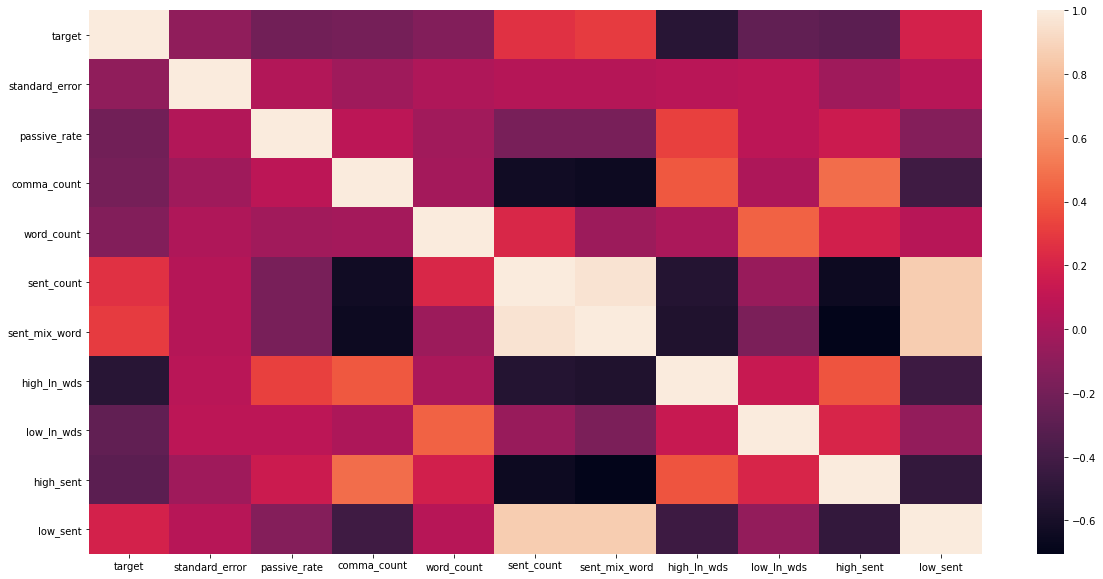

In [223]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

In [224]:
print(df.iloc[0]['excerpt'])

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.


# Boosting Model : AdaBoostRegressor

In [227]:
X  = df.drop(['id', 'excerpt', 'target','standard_error'], axis = 1)
y = df.target
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
y_preds_boost = boosting_model.predict(X_train)       

from sklearn.ensemble import AdaBoostRegressor
boosting_model = AdaBoostRegressor(random_state=0, n_estimators=100)
boosting_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

### Printing accuracy measurements 

In [232]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
accuracy = boosting_model.score(X_train,y_train)
y_preds_boost = boosting_model.predict(X_train)
r_squared = r2_score(y_preds_boost,y_train)        
mse = mean_squared_error(y_preds_boost, y_train)

print(f'r_squared is {r_squared}')
print(f'mse is {mse}')
print(f'accuracy is {accuracy}')

r_squared is -1.1165496948532092
mse is 0.6447070920171043
accuracy is 0.3903161179496246


# Bagging Model : Random Forest 

In [235]:
from sklearn.ensemble import RandomForestRegressor
bagging_model = RandomForestRegressor(random_state=101, n_estimators=100)
bagging_model.fit(X_train, y_train)
y_preds_bags = bagging_model.score(X_train, y_train)

### Printing the accuracy measures

In [242]:
accuracy = bagging_model.score(X_train,y_train)
y_preds_bagging = bagging_model.predict(X_train)
r_squared = r2_score(y_preds_bagging,y_train)        
mse = mean_squared_error(y_preds_bagging, y_train)

print(f'r_squared is {r_squared}')
print(f'mse is {mse}')
print(f'accuracy is {accuracy}')

r_squared is 0.8642791619285993
mse is 0.09350688159503964
accuracy is 0.9115728068215883


# Cross Validation 

## Cross validation of Random forest classifier

In [238]:
scores = []
for i in range(0,9): 
    X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = i)
    model = RandomForestRegressor(random_state= i, n_estimators = 800)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    scores.append(score)
print(scores)
print(np.mean(np.array(scores)))

[0.9112148889690667, 0.9111861450717175, 0.909155051621152, 0.9105178172346066, 0.911275548130021, 0.9097923552410002, 0.9106449892400104, 0.9101322037740553, 0.909249989852543]
0.9103521099037969


## Cross validation of adaboost classifier

In [239]:
scores = []
for i in range(0,9): 
    X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
    model = AdaBoostRegressor(random_state= i, n_estimators=100)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    scores.append(score)
print(scores)
print(np.mean(np.array(scores)))

[0.3903161179496246, 0.3958952132855872, 0.3944799938974869, 0.39823510259009065, 0.3934564891152966, 0.39833819591211694, 0.3930212718673689, 0.39882782547985507, 0.3986469914749603]
0.39569080017470964


 # Loading the final test data set 

In [240]:
test = pd.read_csv('/home/thomaskutty/Downloads/test.csv')

test = generate_features(test)
test = test.drop(['id', 'url_legal','license','excerpt'],axis = 1)

test['ada_predictions'] = boosting_model.predict(test)
test

,passive_rate,comma_count,word_count,sent_count,sent_mix_word,high_ln_wds,low_ln_wds,high_sent,low_sent,ada_predictions
0,0.000,0.666667,147,9,0.061224,1.666667,45,1,1,-0.511636
1,0.000,0.769231,179,13,0.072626,1.076923,28,2,5,-0.169749
2,0.000,1.142857,168,14,0.083333,1.571429,20,3,6,-0.524052
3,0.375,1.250000,179,8,0.044693,6.125000,38,3,1,-1.644458
4,0.000,2.142857,167,7,0.041916,6.285714,33,3,1,-1.646721
5,0.000,1.000000,148,8,0.054054,2.375000,35,3,1,-1.030493
6,0.000,0.375000,161,16,0.099379,1.187500,29,0,8,-0.203544


In [241]:
test = pd.read_csv('/home/thomaskutty/Downloads/test.csv')

test = generate_features(test)
test = test.drop(['id', 'url_legal','license','excerpt'],axis = 1)

test['bagging_predictions'] = bagging_model.predict(test)
test

,passive_rate,comma_count,word_count,sent_count,sent_mix_word,high_ln_wds,low_ln_wds,high_sent,low_sent,bagging_predictions
0,0.000,0.666667,147,9,0.061224,1.666667,45,1,1,-0.202120
1,0.000,0.769231,179,13,0.072626,1.076923,28,2,5,-0.260880
2,0.000,1.142857,168,14,0.083333,1.571429,20,3,6,-0.533672
3,0.375,1.250000,179,8,0.044693,6.125000,38,3,1,-1.879810
4,0.000,2.142857,167,7,0.041916,6.285714,33,3,1,-1.907375
5,0.000,1.000000,148,8,0.054054,2.375000,35,3,1,-0.566886
6,0.000,0.375000,161,16,0.099379,1.187500,29,0,8,-0.339654
